In [93]:
'''
this file was used to inspect which taxa were only in flowcam or microscopy
to figure out if there may have been naming errors or trends in which taxa were exclusive to each.
'''
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [94]:
flow_df = pd.read_excel('./FinnisData-20241007T133632Z-001/FinnisData/Method Paper/flowcamDataMethodPaper_RawCounts.xlsx')
mic_df = pd.read_excel('./FinnisData-20241007T133632Z-001/FinnisData/Method Paper/microscopyDataMethodPaper_RawCounts.xlsx')

In [95]:
flowname_df = pd.read_excel('./FinnisData-20241007T133632Z-001/FinnisData/Method Paper/methodPaperZooNameChanges.xlsx', sheet_name='flowcamAdjustments')

In [96]:
summary_df = pd.read_excel('./FinnisData-20241007T133632Z-001/FinnisData/Method Paper/methodPaperDataForFigures.xlsx')

In [97]:
for i, row in flowname_df.iterrows():
    flow_df = flow_df.replace({row['flowcamName']: row['newName']})
    
flow_df['originalNames'].unique()

array(['Acartia spp.', 'Centropages spp.', 'Copepoda (unid)',
       'Eurytemora spp.', 'Evadne spp.', 'Harpacticoida- epibenthic',
       'Hydrozoa (medusa)', 'Obelia spp. (medusa)', 'Oithona spp.',
       'Podon/Pleopsis spp.', 'Pseudocalanus spp.', 'Temora spp.',
       'Zooplankton (unid)', 'Aglantha spp. (medusa)', 'Amphipoda',
       'Bivalvia (larvae)', 'Calanus spp.',
       'Gastropoda (larvae/Limacina)', 'Metridia spp.', 'Oikopleura spp.',
       'Echinodermata (larvae)', 'Chaetognatha', 'Chiridius spp.',
       'Fritillaria spp.', 'Invertebrate (egg, trochophore larvae)',
       'Anthoathecata (medusa)', 'Calanoida (unid)', 'Cnidaria (larvae)',
       'Osteichthyes egg', 'Tomopteris spp.',
       'Decapoda- non-brachyura (larvae)', 'Polychaeta (larvae)',
       'Bryozoa (larvae)', 'Calanoida (ci-ciii)', 'Microcalanus spp.',
       'Tortanus spp.', 'Chaetognatha (juvenile or n.s.)',
       'Oncaeidae_Civ-vi', 'Ostracoda', 'Sarsia_spp_medusa',
       'Osteichthyes_eggs', 'Cycl

In [5]:
taxa_exclusion_list = [
    'Ctenophora (juvenile/adult)',
    'Scyphozoa (larvae)',
    'Isopoda (larvae)',
    'Neoturris spp. (medusa)',
    'Platyhelminthes/Nemertea (juvenile)',
    'Platyhelminthes/Nemertea (larvae)',
    'Siphonophorae (nectophore)',
    'Sarsia spp. (medusa)',
    'Amphipoda- epibenthic',
    'Leuckartiara spp. (medusa)',
    'Alciopidae sp.',
    'Epilabidocera spp.',
    'Scyphozoa (medusa)',
]
flow_df = flow_df[~flow_df['originalNames'].isin(taxa_exclusion_list)]
mic_df = mic_df[~mic_df['newName'].isin(taxa_exclusion_list)]

In [98]:
flow_names = flow_df['originalNames'].unique()
mic_names = mic_df['newName'].unique()
print(len(mic_names))
mic_names

50


array(['Evadne spp.', 'Podon/Pleopsis spp.', 'Chaetognatha',
       'Oikopleura spp.', 'Hydrozoa (medusa)', 'Echinodermata (larvae)',
       'Bivalvia (larvae)', 'Aglantha spp. (medusa)', 'Bryozoa (larvae)',
       'Calanoida (ci-ciii)', 'Pseudocalanus spp.', 'Acartia spp.',
       'Oithona spp.', 'Temora spp.', 'Centropages spp.',
       'Eurytemora spp.', 'Tortanus spp.', 'Harpacticoida- epibenthic',
       'Gastropoda (larvae/Limacina)', 'Polychaeta (larvae)',
       'Fritillaria spp.', 'Sarsia spp. (medusa)',
       'Invertebrate (egg, trochophore larvae)', 'Calanus spp.',
       'Obelia spp. (medusa)', 'Microcalanus spp.', 'Copepoda (nauplii)',
       'Pseudodiaptomus spp.', 'Ascidiacea (larvae)',
       'Cirripedia (larvae)', 'Paracalanus spp.', 'Corycaeidae',
       'Ctenophora (juvenile/adult)', 'Egg mass: REMOVE',
       'Platyhelminthes/Nemertea (juvenile)',
       'Siphonophorae (nectophore)', 'Decapoda- brachyura (larvae)',
       'Decapoda: Distribute abundances between no

In [99]:
len(mic_df['newName'])

861

In [100]:
set1 = set(flow_names)
set2 = set(mic_names)

# Values in list1 that are not in list2
only_in_list1 = set1 - set2

# Values in list2 that are not in list1
only_in_list2 = set2 - set1

print("Values in new_flow_names but not in mic_names:", only_in_list1)
print("Values in mic_names but not in new_flow_names:", only_in_list2)

Values in new_flow_names but not in mic_names: {'Tomopteris spp.', 'Euphysa spp. (medusa)', 'Chiridius spp.', 'Ctenophora larvae', 'Microsetella spp.', 'Copepoda (unid)', 'Amphipoda', 'Anthoathecata (medusa)', 'Cyclopoida (unid)', 'Osteichthyes_eggs', 'Foraminifera', 'Calanoida (unid)', 'Sarsia_spp_medusa', 'Cnidaria (larvae)', 'Osteichthyes egg', 'Zooplankton (unid)', 'Ostracoda', 'Oncaeidae_Civ-vi', 'Chaetognatha (juvenile or n.s.)', 'Metridia spp.', 'Monstrillidae'}
Values in mic_names but not in new_flow_names: {'Siphonophorae (nectophore)', 'Epilabidocera spp.', 'Leuckartiara spp. (medusa)', 'Amphipoda- epibenthic', 'Platyhelminthes/Nemertea (larvae)', 'Scyphozoa (medusa)', 'Decapoda: Distribute abundances between non-brachyura and brachyura', 'Platyhelminthes/Nemertea (juvenile)', 'Sarsia spp. (medusa)', 'Scyphozoa (larvae)', 'Isopoda (larvae)', 'Neoturris spp. (medusa)', 'Ctenophora (juvenile/adult)', 'Egg mass: REMOVE', 'Alciopidae sp.'}


In [101]:
print("-------------------only in microscopy: ")
microscopy_list = []
for item in only_in_list2:
    if 'Egg' not in item and 'Decapoda' not in item:
        print(item)
        microscopy_list.append(item)

-------------------only in microscopy: 
Siphonophorae (nectophore)
Epilabidocera spp.
Leuckartiara spp. (medusa)
Amphipoda- epibenthic
Platyhelminthes/Nemertea (larvae)
Scyphozoa (medusa)
Platyhelminthes/Nemertea (juvenile)
Sarsia spp. (medusa)
Scyphozoa (larvae)
Isopoda (larvae)
Neoturris spp. (medusa)
Ctenophora (juvenile/adult)
Alciopidae sp.


In [102]:
microscopy_list

['Siphonophorae (nectophore)',
 'Epilabidocera spp.',
 'Leuckartiara spp. (medusa)',
 'Amphipoda- epibenthic',
 'Platyhelminthes/Nemertea (larvae)',
 'Scyphozoa (medusa)',
 'Platyhelminthes/Nemertea (juvenile)',
 'Sarsia spp. (medusa)',
 'Scyphozoa (larvae)',
 'Isopoda (larvae)',
 'Neoturris spp. (medusa)',
 'Ctenophora (juvenile/adult)',
 'Alciopidae sp.']

In [10]:
mic_df[mic_df['newName'] == 'Siphonophorae (nectophore)']

,Biologica/HMSC Sample ID,qaSampleID,FlowCamID,region,regionYear,waterVolume,Taxon,Stage,taxStage,newName,Subsample fraction,countSample,countTot


In [11]:
name_count_dict = {
'Alciopidae sp.': 1,
 'Amphipoda- epibenthic': 1,
 'Ctenophora (juvenile/adult)': 10,
 'Epilabidocera spp.': 1,
 'Isopoda (larvae)': 1,
 'Leuckartiara spp. (medusa)': 2,
 'Neoturris spp. (medusa)': 2,
 'Platyhelminthes/Nemertea (juvenile)': 1,
 'Platyhelminthes/Nemertea (larvae)': 1,
 'Sarsia spp. (medusa)': 4,
 'Scyphozoa (larvae)': 1,
 'Scyphozoa (medusa)': 2,
 'Siphonophorae (nectophore)': 10
}

In [12]:
print("-------------------only in flowcam: ")
for item in only_in_list1:
    if 'unid' not in item:
        print(item)

-------------------only in flowcam: 
Tomopteris spp.
Euphysa spp. (medusa)
Chiridius spp.
Ctenophora larvae
Microsetella spp.
Amphipoda
Anthoathecata (medusa)
Osteichthyes_eggs
Foraminifera
Sarsia_spp_medusa
Cnidaria (larvae)
Osteichthyes egg
Ostracoda
Oncaeidae_Civ-vi
Chaetognatha (juvenile or n.s.)
Metridia spp.
Monstrillidae


In [13]:
flow_df[flow_df['originalNames'] == 'Sarsia_spp_medusa']

,sampleCode,flowcamFileName,qaSampleID,yearStart,monthStart,dayStart,facilityName,region,depthWaterM,waterVolume,...,equipmentType,TowType,netMesh,originalNames,count,dataset,fracSampleCleaned,fracZooIdentified,finnisMapLabel,tidePhase
266,21_10_05_NL_S01_Z41_0854_250,21_10_05_NL_S1_Z41_0854_250,21-10-5-NL-S1-Z41-854-250,2021,10,5,Southeast Arm,Newfoundland,45.0,8.835722,...,250 um net,vertical,250,Sarsia_spp_medusa,2,Newfoundland 2021,1.0,0.752926,Mid-B,Mid-Falling
319,21_10_06_NL_S01_Z17_0802_250,21_10_06_NL_S1_Z17_0802_250,21-10-6-NL-S1-Z17-802-250,2021,10,6,Southeast Arm,Newfoundland,44.0,8.639373,...,250 um net,vertical,250,Sarsia_spp_medusa,2,Newfoundland 2021,1.0,0.600000,Outer,High


In [14]:
flow_df

,sampleCode,flowcamFileName,qaSampleID,yearStart,monthStart,dayStart,facilityName,region,depthWaterM,waterVolume,...,equipmentType,TowType,netMesh,originalNames,count,dataset,fracSampleCleaned,fracZooIdentified,finnisMapLabel,tidePhase
0,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Acartia spp.,787,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
1,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Centropages spp.,28,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
2,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Copepoda (unid),85,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
3,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Eurytemora spp.,27,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
4,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Evadne spp.,175,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Decapoda- non-brachyura (larvae),3,Pacific June 2021,1.0,1.0,Outer,High
954,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Hydrozoa (medusa),2,Pacific June 2021,1.0,1.0,Outer,High
955,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Oikopleura spp.,17,Pacific June 2021,1.0,1.0,Outer,High
956,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Polychaeta (larvae),2,Pacific June 2021,1.0,1.0,Outer,High


In [15]:
for name in microscopy_list:
    print('----------', name, '---------------')
    name_df = mic_df[mic_df['newName'] == name]
    samples = name_df['FlowCamID'].unique()
    sampleCount = len(samples)
    for sample in samples:
        print(f"sample: {sample}, {name_df[name_df['FlowCamID'] == sample]['countSample'].sum()}")

In [16]:
pac_mic_df = mic_df[mic_df['regionYear'] == 'Pac 21']

In [17]:
pac_mic_df.groupby('newName')['countSample'].sum()


newName
Acartia spp.                                                           1459
Ascidiacea (larvae)                                                       4
Bivalvia (larvae)                                                       154
Bryozoa (larvae)                                                          1
Calanoida (ci-ciii)                                                      57
Calycophorae (nectophore)                                                 3
Centropages spp.                                                         61
Chaetognatha                                                              3
Cirripedia (larvae)                                                     660
Copepoda (nauplii)                                                        8
Corycaeidae                                                             220
Decapoda- brachyura (larvae)                                            144
Decapoda- non-brachyura (larvae)                                         57
Deca

In [18]:
pac_mic_names

NameError: name 'pac_mic_names' is not defined

16
11
25
16
12
18
22
29
15
15


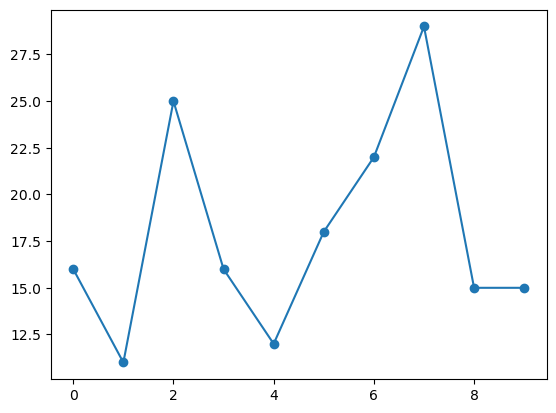

In [19]:
gulf_tax_counts = []
flow_samples = flow_df['qaSampleID'].unique()
for sample in flow_samples:
    taxa_list = flow_df[(flow_df['qaSampleID'] == sample) & (flow_df['region'] == 'Gulf')]['originalNames'].unique()
    if len(taxa_list) > 0:
        gulf_tax_counts.append(len(taxa_list))
        print(len(taxa_list))
plt.plot(gulf_tax_counts)
plt.scatter(range(len(gulf_tax_counts)), gulf_tax_counts)
plt.show()
plt.close()

In [20]:
mic_samples = mic_df['FlowCamID'].unique()
for sample in mic_samples:
    print(sample)

21_10_05_NL_S1_Z17_0752_250
21_10_05_NL_S1_Z17_1406_250
21_10_05_NL_S1_Z41_0854_250
21_10_05_NL_S1_Z41_1327_250
21_10_06_NL_S1_Z17_0802_250
21_10_06_NL_S1_Z17_1442_250
21_10_06_NL_S1_Z41_0839_250
21_10_06_NL_S1_Z41_1412_250
21_10_07_NL_S1_Z17_0830_250
21_10_07_NL_S1_Z17_1459_250
AMMP_NL_S01_77_20200915PM_250UM
AMMP_NL_S01_51_20200915PM_250UM
AMMP_NL_S01_77_20200916AM_250UM
AMMP_NL_S01_51_20200916AM_250UM
AMMP_NL_S01_33_20200916AM_250UM
AMMP_NL_S01_41_20200916AM_250UM
AMMP_NL_S01_77_20200916PM_250UM
AMMP_NL_S01_51_20200916PM_250UM
AMMP_NL_S01_33_20200916PM_250UM
AMMP_NL_S01_41_20200916PM_250UM
AMMP_Gulf_StPeters_2B_20200903_250UM
AMMP_Gulf_StPeters_3B_20200903_250UM
AMMP_Gulf_StPeters_1_20200903HT_250UM
AMMP_Gulf_StPeters_2_20200903HT_250UM
AMMP_Gulf_StPeters_3_20200903HT_250UM
AMMP_Gulf_StPeters_1_20200903LT_250UM
AMMP_Gulf_StPeters_3_20200903LT_250UM
AMMP_Gulf_StPeters_1_20200904HT_250UM
AMMP_Gulf_StPeters_2_20200904HT_250UM
AMMP_Gulf_StPeters_3_20200904HT_250UM
AMMP_PA_S04W01_2021060

In [21]:
flow_df['qaSampleID'].unique()

array(['AMMP_NL_S01_77_2020.09.15_PM_250um',
       'AMMP_NL_S01_51_2020.09.15_PM_250um',
       'AMMP_NL_S01_77_2020.09.16_AM_250um',
       'AMMP_NL_S01_51_2020.09.16_AM_250um',
       'AMMP_NL_S01_33_2020.09.16_AM_250um',
       'AMMP_NL_S01_41_2020.09.16_AM_250um',
       'AMMP_NL_S01_77_2020.09.16_PM_250um',
       'AMMP_NL_S01_51_2020.09.16_PM_250um',
       'AMMP_NL_S01_33_2020.09.16_PM_250um',
       'AMMP_NL_S01_41_2020.09.16_PM_250um', '21-10-5-NL-S1-Z17-752-250',
       '21-10-5-NL-S1-Z17-1406-250', '21-10-5-NL-S1-Z41-854-250',
       '21-10-5-NL-S1-Z41-1327-250', '21-10-6-NL-S1-Z17-802-250',
       '21-10-6-NL-S1-Z17-1442-250', '21-10-6-NL-S1-Z41-839-250',
       '21-10-6-NL-S1-Z41-1412-250', '21-10-7-NL-S1-Z17-830-250',
       '21-10-7-NL-S1-Z17-1459-250',
       'AMMP_Gulf_St Peters_2020.09.03_2B_250um',
       'AMMP_Gulf_St Peters_2020.09.03_3B_250um',
       'AMMP_Gulf_St Peters_2020.09.03_High 1_250um',
       'AMMP_Gulf_St Peters_2020.09.03_High 2_250um',
       'AMMP

In [22]:

flow_df[flow_df['qaSampleID'] == 'AMMP_Pacific_S04W01_250um_Low_2021-06-10']

,sampleCode,flowcamFileName,qaSampleID,yearStart,monthStart,dayStart,facilityName,region,depthWaterM,waterVolume,...,equipmentType,TowType,netMesh,originalNames,count,dataset,fracSampleCleaned,fracZooIdentified,finnisMapLabel,tidePhase
819,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Acartia spp.,287,Pacific June 2021,0.056593,1.0,Mid,Low
820,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Ascidiacea (larvae),6,Pacific June 2021,0.056593,1.0,Mid,Low
821,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Bivalvia (larvae),4,Pacific June 2021,0.056593,1.0,Mid,Low
822,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Calanoida (ci-ciii),22,Pacific June 2021,0.056593,1.0,Mid,Low
823,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Calanoida (unid),81,Pacific June 2021,0.056593,1.0,Mid,Low
824,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Calanus spp.,1,Pacific June 2021,0.056593,1.0,Mid,Low
825,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Calycophorae (nectophore),3,Pacific June 2021,0.056593,1.0,Mid,Low
826,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Centropages spp.,4,Pacific June 2021,0.056593,1.0,Mid,Low
827,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Cirripedia (larvae),5,Pacific June 2021,0.056593,1.0,Mid,Low
828,AMMP_PA_S04W20_20210610LT_250um,AMMP_PA_S04W20_20210610LT_250um,AMMP_Pacific_S04W01_250um_Low_2021-06-10,2021,6,10,LEMMENS,Pacific,22.0,14.900842,...,50 x 150 cm Net,Vertical,250,Cirripedia (larvae),239,Pacific June 2021,0.056593,1.0,Mid,Low


In [23]:
flow_df

,sampleCode,flowcamFileName,qaSampleID,yearStart,monthStart,dayStart,facilityName,region,depthWaterM,waterVolume,...,equipmentType,TowType,netMesh,originalNames,count,dataset,fracSampleCleaned,fracZooIdentified,finnisMapLabel,tidePhase
0,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Acartia spp.,787,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
1,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Centropages spp.,28,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
2,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Copepoda (unid),85,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
3,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Eurytemora spp.,27,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
4,20_09_15_NL_S01_Z77_1451_250,AMMP_NL_S01_77_20200915PM_250UM,AMMP_NL_S01_77_2020.09.15_PM_250um,2020,9,15,Southeast Arm,Newfoundland,17.0,3.100000,...,250um net,Vertical,250,Evadne spp.,175,Newfoundland 2020,1.0,1.0,Inner,Mid-Rising
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Decapoda- non-brachyura (larvae),3,Pacific June 2021,1.0,1.0,Outer,High
954,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Hydrozoa (medusa),2,Pacific June 2021,1.0,1.0,Outer,High
955,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Oikopleura spp.,17,Pacific June 2021,1.0,1.0,Outer,High
956,AMMP_PA_S04W01_20210610HT_250um,AMMP_PA_S04W01_20210610HT_5mm,AMMP_Pacific_S04W01_250um_High_2021-06-10,2021,6,10,LEMMENS,Pacific,16.0,17.116973,...,50 x 150 cm Net,Vertical,250,Polychaeta (larvae),2,Pacific June 2021,1.0,1.0,Outer,High


In [24]:
test_flow_names = flow_df[flow_df['region'] == 'Pacific']['originalNames'].unique()
test_flow_names.sort()
for name in test_flow_names:
    print(name)

Acartia spp.
Ascidiacea (larvae)
Bivalvia (larvae)
Bryozoa (larvae)
Calanoida (ci-ciii)
Calanoida (unid)
Calanus spp.
Calycophorae (nectophore)
Centropages spp.
Cirripedia (larvae)
Copepoda (nauplii)
Corycaeidae
Ctenophora larvae
Cyclopoida (unid)
Decapoda- brachyura (larvae)
Decapoda- non-brachyura (larvae)
Echinodermata (larvae)
Euphysa spp. (medusa)
Evadne spp.
Fritillaria spp.
Gastropoda (larvae/Limacina)
Hydrozoa (medusa)
Invertebrate (egg, trochophore larvae)
Oikopleura spp.
Oithona spp.
Osteichthyes (larvae)
Osteichthyes egg
Ostracoda
Paracalanus spp.
Podon/Pleopsis spp.
Polychaeta (larvae)
Pseudocalanus spp.
Tortanus spp.
Zooplankton (unid)


In [28]:
flowname_df

,flowcamName,newName
0,Acartia spp Civ-vi,Acartia spp.
1,Acartia_spp_Civ-vi,Acartia spp.
2,Actinopterygii_larva,Osteichthyes (larvae)
3,Aglantha digitale medusa,Aglantha spp. (medusa)
4,Aglantha_spp_medusa,Aglantha spp. (medusa)
...,...,...
111,Unidentified copepoda,Copepoda (unid)
112,Unidentified Copepoda,Copepoda (unid)
113,Unidentified zooplankton,Zooplankton (unid)
114,Unidentified Zooplankton,Zooplankton (unid)


In [80]:
summary_df

,newName,FlowCamID,regionYear,qaSampleID,type,abund
0,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,NL 2021,21-10-5-NL-S1-Z17-752-250,FC,295.389927
1,Acartia spp.,21_10_05_NL_S1_Z17_0752_250,NL 2021,21-10-5-NL-S1-Z17-752-250,MC,840.225611
2,Acartia spp.,21_10_05_NL_S1_Z17_1406_250,NL 2021,21-10-5-NL-S1-Z17-1406-250,FC,302.454915
3,Acartia spp.,21_10_05_NL_S1_Z17_1406_250,NL 2021,21-10-5-NL-S1-Z17-1406-250,MC,2732.904575
4,Acartia spp.,21_10_05_NL_S1_Z41_0854_250,NL 2021,21-10-5-NL-S1-Z41-854-250,FC,182.975667
...,...,...,...,...,...,...
1383,Tortanus spp.,AMMP_PA_S04W20_20210609HT_250um,Pac 21,AMMP_Pacific_S04W20_250um_High_2021-06-09,MC,7.060098
1384,Tortanus spp.,AMMP_PA_S04W20_20210609LT_250um,Pac 21,AMMP_Pacific_S04W20_250um_Low_2021-06-09,FC,16.845201
1385,Tortanus spp.,AMMP_PA_S04W20_20210609LT_250um,Pac 21,AMMP_Pacific_S04W20_250um_Low_2021-06-09,MC,3.662212
1386,Tortanus spp.,AMMP_PA_S04W20_20210610LT_250um,Pac 21,AMMP_Pacific_S04W01_250um_Low_2021-06-10,FC,19.966048


In [81]:
summary_df = summary_df[summary_df['type'] == 'FC']


Gulf 2020
------------ AMMP_Gulf_StPeters_1_20200903HT_250UM -----------
------------ AMMP_Gulf_StPeters_1_20200903LT_250UM -----------
------------ AMMP_Gulf_StPeters_1_20200904HT_250UM -----------
------------ AMMP_Gulf_StPeters_2B_20200903_250UM -----------
------------ AMMP_Gulf_StPeters_2_20200903HT_250UM -----------
------------ AMMP_Gulf_StPeters_2_20200904HT_250UM -----------
------------ AMMP_Gulf_StPeters_3B_20200903_250UM -----------
------------ AMMP_Gulf_StPeters_3_20200903HT_250UM -----------
------------ AMMP_Gulf_StPeters_3_20200903LT_250UM -----------
------------ AMMP_Gulf_StPeters_3_20200904HT_250UM -----------
NL 2020
------------ AMMP_NL_S01_33_20200916AM_250UM -----------
------------ AMMP_NL_S01_33_20200916PM_250UM -----------
------------ AMMP_NL_S01_41_20200916AM_250UM -----------
------------ AMMP_NL_S01_41_20200916PM_250UM -----------
------------ AMMP_NL_S01_51_20200915PM_250UM -----------
------------ AMMP_NL_S01_51_20200916AM_250UM -----------
------------

C:\Users\newblearbomb\AppData\Local\Temp\ipykernel_2272\2538289758.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sampledf = sampledf[~sampledf['newName'].str.contains('(unid)')]
C:\Users\newblearbomb\AppData\Local\Temp\ipykernel_2272\2538289758.py:39: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sampledf = sampledf[~sampledf['originalNames'].str.contains('(unid)')]


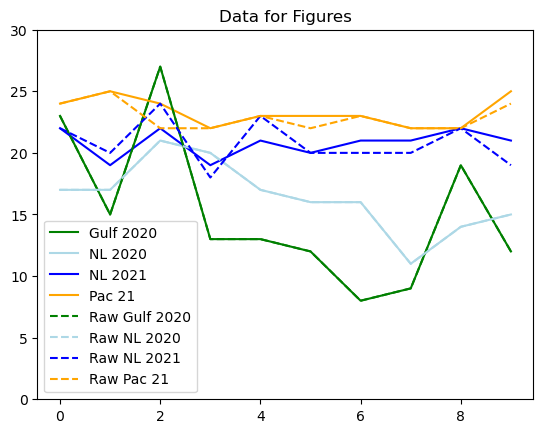

In [88]:
colorsDict = {'NL 2021': 'blue', 'NL 2020': 'lightblue', 'Gulf 2020': 'green', 'Pac 21': 'orange'}
taxa_dict = {'summary': {}, 'raw': {}}
regionYears = summary_df['regionYear'].unique()
regionYears.sort()
for regionYear in regionYears:
    taxa_dict['summary'][regionYear] = []
    print(regionYear)
    regiondf = summary_df[summary_df['regionYear'] == regionYear]
    samples = regiondf['FlowCamID'].unique()
    samples.sort()
    regional_taxa_amounts = []
    
    for s, sample in enumerate(samples):
        print('------------', sample, '-----------')
        sampledf = regiondf[regiondf['FlowCamID'] == sample]
        sampledf = sampledf[~sampledf['newName'].str.contains('(unid)')]
        sampledf = sampledf[~sampledf['newName'].str.contains('egg')]
        taxa = sampledf['newName'].unique()
        taxa_dict['summary'][regionYear].append(taxa)
        # print(len(taxa))
        regional_taxa_amounts.append(len(taxa))
    plt.plot(regional_taxa_amounts, label=regionYear, color=colorsDict[regionYear])
regionYears = flow_df['regionYear'].unique()
regionYears.sort()
for regionYear in regionYears:
    taxa_dict['raw'][regionYear] = []
    print(regionYear)
    regiondf = flow_df[flow_df['regionYear'] == regionYear]
    samples = regiondf['flowcamFileName'].unique()
    samples.sort()
    regional_taxa_amounts = []
    for sample in samples:
        if '5mm' in sample:
            continue
        if 'Chaetognatha' in sample:
            continue
        print('------------', sample, '-----------')
        sampledf = regiondf[regiondf['flowcamFileName'] == sample]
        sampledf = sampledf[~sampledf['originalNames'].str.contains('(unid)')]
        sampledf = sampledf[~sampledf['originalNames'].str.contains('egg')]
        taxa = sampledf['originalNames'].unique()
        taxa_dict['raw'][regionYear].append(taxa)
        # print(len(taxa))
        regional_taxa_amounts.append(len(taxa))
    plt.plot(regional_taxa_amounts, label='Raw ' + regionYear, color=colorsDict[regionYear], linestyle='--')

plt.legend()
plt.ylim([0, 30])
plt.title('Data for Figures')
plt.show()
plt.close()
        

In [89]:
def check_name_diffs(taxa_dict, regionYears):
    for regionYear in regionYears:
        print('--------------', regionYear)
        region_summary_taxa = taxa_dict['summary'][regionYear]
        region_raw_taxa = taxa_dict['raw'][regionYear]
        for i in range(len(region_summary_taxa)):
            print('----------')
            summary_taxa = set(region_summary_taxa[i])
            raw_taxa = set(region_raw_taxa[i])
            print('only in summary: ', summary_taxa - raw_taxa)
            print('only in raw: ', raw_taxa - summary_taxa)
check_name_diffs(taxa_dict, regionYears)            

-------------- Gulf 2020
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
-------------- NL 2020
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only in summary:  set()
only in raw:  set()
----------
only i

In [92]:
for regionYear in taxa_dict['summary'].keys():
    print(regionYear)
    region_taxa = taxa_dict['summary'][regionYear]
    for i in range(len(region_taxa)):
        print('sample ', i + 1)
        print(region_taxa[i])

Gulf 2020
sample  1
['Acartia spp.' 'Bivalvia (larvae)' 'Bryozoa (larvae)' 'Centropages spp.'
 'Chaetognatha' 'Cirripedia (larvae)' 'Cnidaria (larvae)'
 'Copepoda (nauplii)' 'Decapoda- non-brachyura (larvae)' 'Evadne spp.'
 'Gastropoda (larvae/Limacina)' 'Harpacticoida- epibenthic'
 'Hydrozoa (medusa)' 'Monstrillidae' 'Obelia spp. (medusa)'
 'Oikopleura spp.' 'Oithona spp.' 'Paracalanus spp.' 'Podon/Pleopsis spp.'
 'Polychaeta (larvae)' 'Pseudocalanus spp.' 'Pseudodiaptomus spp.'
 'Temora spp.']
sample  2
['Acartia spp.' 'Ascidiacea (larvae)' 'Calanoida (ci-ciii)'
 'Centropages spp.' 'Copepoda (nauplii)'
 'Decapoda- non-brachyura (larvae)' 'Evadne spp.'
 'Gastropoda (larvae/Limacina)' 'Harpacticoida- epibenthic'
 'Hydrozoa (medusa)' 'Oithona spp.' 'Podon/Pleopsis spp.'
 'Polychaeta (larvae)' 'Pseudodiaptomus spp.' 'Temora spp.']
sample  3
['Acartia spp.' 'Ascidiacea (larvae)' 'Bivalvia (larvae)'
 'Bryozoa (larvae)' 'Centropages spp.' 'Chaetognatha'
 'Cirripedia (larvae)' 'Cnidaria (lar

In [ ]:
sample8 = [Evadne spp Civ-vi	122963.97
Podon/Pleopis spp	310364.23
Acartia spp Civ-vi	225328.48
Oithona spp Civ-vi	58248.81
Centropages spp Civ-vi	437814.49
Pseudocalanus spp Civ-vi	242148.23
Calanus spp	0
Calanoida Ci-iii	0
Temora spp Civ-vi	212655.37
Harpacticoida Ci-vi	160168.57
Eurytemora spp Civ-vi	165314.79
Aglantha digitale medusa	0
Hydrozoa juvenile medusa	757052.61
Oikopleura spp	0
Chaetognatha	0
Gastropoda larvae/Lamacina spp	0
Caridea zoea larvae/Paragus spp zoea	0
Obelia spp medusa	491281.62
]